In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.metrics.pairwise import euclidean_distances
import os

In [2]:
# Function to read and resize images
def read_and_resize_image(image_path, target_size=(100, 100)):
    image = cv2.imread(image_path)  # Read image in BGR format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize image to target size
    return image

In [15]:
# Dataset path
dataset_path = r"D:\INFORMATION RETRIEVAL\Classes\Images"

# Read the dataset
dataset_images = []
dataset_paths = []

In [16]:
# Assuming the dataset is structured such that each class has its own subdirectory
# Modify the code according to your dataset structure
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = read_and_resize_image(image_path)  # Read and resize image
        dataset_images.append(image)
        dataset_paths.append(image_path)

# Convert lists to numpy arrays
dataset_images = np.array(dataset_images)
dataset_paths = np.array(dataset_paths)

In [23]:
# Read the query image
query_image_path = r"D:\INFORMATION RETRIEVAL\Classes\querry\924.jpg"
query_image = read_and_resize_image(query_image_path)

In [24]:
# Convert RGB image to grayscale
query_image_gray = cv2.cvtColor(query_image, cv2.COLOR_RGB2GRAY)

In [25]:
# Extract LBP features for the query image
query_features = local_binary_pattern(query_image_gray, 8, 1, method='uniform')
hist_query, _ = np.histogram(query_features.ravel(), bins=np.arange(0, 10), range=(0, 9))
norm_hist_query = hist_query / np.sum(hist_query)

In [26]:
# Compute Euclidean distances between query features and dataset features
distances = []
for image in dataset_images:
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features = local_binary_pattern(image_gray, 8, 1, method='uniform')
    hist, _ = np.histogram(features.ravel(), bins=np.arange(0, 10), range=(0, 9))
    norm_hist = hist / np.sum(hist)
    distance = euclidean_distances([norm_hist_query], [norm_hist])[0][0]
    distances.append(distance)

# Convert distances to numpy array
distances = np.array(distances)

In [27]:
# Sort the distances and get the indices of the 10 nearest images
indices = np.argsort(distances)[:10]

# Retrieve the paths of the 10 nearest images
nearest_images_paths = dataset_paths[indices]

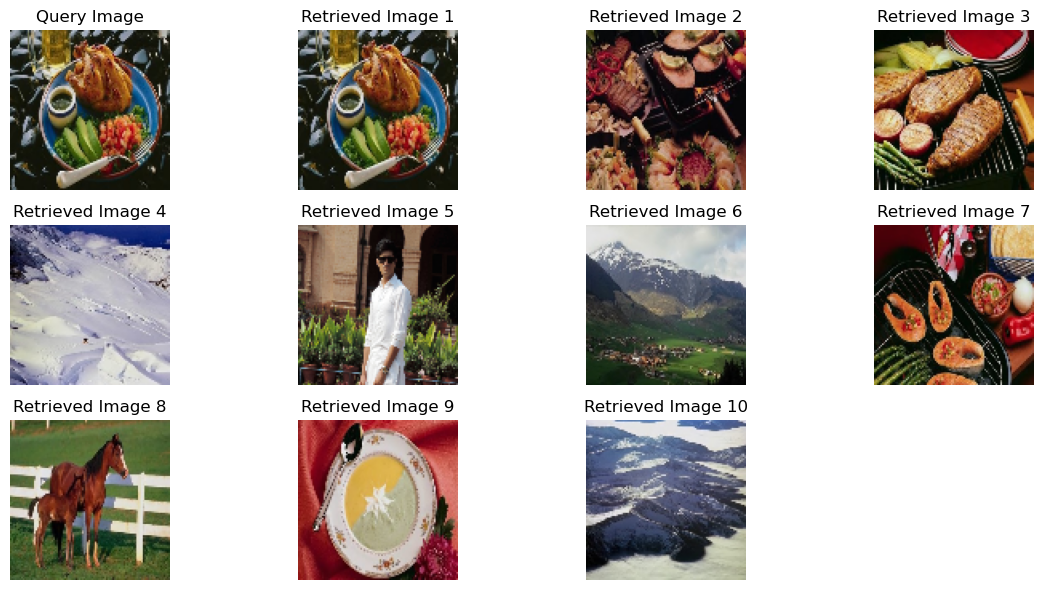

In [28]:
# Plot the query image
plt.figure(figsize=(12, 6))
plt.subplot(3, 4, 1)
plt.imshow(query_image)
plt.title('Query Image')
plt.axis('off')

# Plot the retrieved images
for i, (image_path, index) in enumerate(zip(nearest_images_paths, range(2, 12)), start=1):
    image = read_and_resize_image(image_path)
    plt.subplot(3, 4, index)
    plt.imshow(image)
    plt.title(f'Retrieved Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()